In [2]:
import networkx as nx
import numpy as np
import copy
import random
import random
from input.dataset import Dataset
import matplotlib.pyplot as plt

# 读取数据

In [6]:
source_dataset_URL="graph_data/douban/online/graphsage/"
target_dataset_URL="graph_data/douban/offline/graphsage/"
groundtruth="graph_data/douban/dictionaries/groundtruth"
source_shuffle_dataset_URL="graph_data/douban/online/shuffle/graphsage/"
source_dataset = Dataset(source_dataset_URL)
target_dataset = Dataset(target_dataset_URL)

with open('embedding/super/douban/layer2_ori_matched_dict','rb') as f:
    pred_ori = {}
    for line in f:
        src, trg = line.strip().split()
        pred_ori[int(src)] = int(trg)

with open('embedding/super/douban/layer2_gradalign_matched_dict','rb') as f:
    pred_grad = {}
    for line in f:
        src, trg = line.strip().split()
        pred_grad[int(src)] = int(trg)

with open('embedding/super/douban/layer2_only_ori_matched_dict','rb') as f:
    only_pred_ori = {}
    for line in f:
        src, trg = line.strip().split()
        only_pred_ori[int(src)] = int(trg)

with open('embedding/super/douban/layer2_only_gradalign_matched_dict','rb') as f:
    only_pred_grad = {}
    for line in f:
        src, trg = line.strip().split()
        only_pred_grad[int(src)] = int(trg)

Dataset info:
- Nodes:  3906
- Edges:  8164
Dataset info:
- Nodes:  1118
- Edges:  1511


In [10]:
with open('embedding/super/douban/layer1_ori_matched_dict','rb') as f:
    l1_pred_ori = {}
    for line in f:
        src, trg = line.strip().split()
        l1_pred_ori[int(src)] = int(trg)

with open('embedding/super/douban/layer1_gradalign_matched_dict','rb') as f:
    l1_pred_grad = {}
    for line in f:
        src, trg = line.strip().split()
        l1_pred_grad[int(src)] = int(trg)

with open('embedding/super/douban/layer1_only_ori_matched_dict','rb') as f:
    l1_only_pred_ori = {}
    for line in f:
        src, trg = line.strip().split()
        l1_only_pred_ori[int(src)] = int(trg)

with open('embedding/super/douban/layer1_only_gradalign_matched_dict','rb') as f:
    l1_only_pred_grad = {}
    for line in f:
        src, trg = line.strip().split()
        l1_only_pred_grad[int(src)] = int(trg)

In [ ]:
for key,value in pred_ori.items():
    if key in l1_pred_ori.keys():
        if l1_pred_ori[key] == value:
            print('same')
            print(key,value)
        else:
            print('not same')

In [7]:
def visualize_degree_distribution(node_list,G,name):
    fig,axes = plt.subplots(nrows=4)
    fig.set_size_inches(10,24)
    for k in range(len(node_list)):
        deg = np.zeros((len(node_list[k]),)).astype(int)
        for i in range(len(deg)):
            deg[i] = len(list(G.neighbors(str(node_list[k][i]))))
        deg = np.sort(deg)
        unique, counts = np.unique(deg, return_counts=True)
        y_max = max(counts)
        std = np.std(deg)
        mean = np.mean(deg)
        print("Standard deviation: ", std)
        print("Mean degree: ", mean)
        print("Max degree: ", max(deg))
        quality = round(max(deg) / std, 1)
        print("Quality: ", quality)
        axes[k].hist(np.array(deg), max(deg))
        axes[k].vlines(mean - std, 0, y_max, linestyle='dashed', linewidth=0.8, label='std line')
        axes[k].vlines(mean + std, 0, y_max, linestyle='dashed', linewidth=0.8)
        axes[k].vlines(mean, 0, y_max, color='red', linestyle='dashed', linewidth=1, label='mean line')
        axes[k].text(mean +std*0.05, y_max*2/3, 'mean = ' + str(round(mean, 1)) + ', std = ' + str(round(std, 1)), color='b')
        axes[k].text(max(deg) / 2, y_max/2, 'quality = ' + str(quality))
        axes[k].set_xlabel('degree')
        axes[k].set_ylabel('num nodes')
    axes[0].set_title('ori_deg')
    axes[1].set_title('only_ori_deg')
    axes[2].set_title('grad_deg')
    axes[3].set_title('only_grad_deg')
    plt.grid(True)
    plt.savefig(name+"_deg.png")

In [8]:
visualize_degree_distribution([list(pred_ori.keys()),list(only_pred_ori.keys()),list(pred_grad.keys()),list(only_pred_grad.keys())],source_dataset.G,'source_layer2')

Standard deviation:  8.607471993816453
Mean degree:  6.566552901023891
Max degree:  78
Quality:  9.1
Standard deviation:  8.473638336611346
Mean degree:  6.809523809523809
Max degree:  78
Quality:  9.2
Standard deviation:  8.135639458622704
Mean degree:  7.280327868852459
Max degree:  78
Quality:  9.6
Standard deviation:  8.058585312778147
Mean degree:  7.313274336283186
Max degree:  78
Quality:  9.7


In [ ]:
visualize_degree_distribution([list(pred_ori.values()),list(pred_grad.values()),list(only_pred_ori.values()),list(only_pred_grad.values())],target_dataset.G,'target')

In [211]:
degree_number =[[[] for _ in range(5)] for _ in range(4)]
for key,value in train_four[8].items():
    for i in range(4):
        if value[i]>=0 and value[i]<3:
            degree_number[i][0].append(key)
        elif value[i]>=3 and value[i]<10:
            degree_number[i][1].append(key)
        elif value[i]>=10 and value[i]<25:
            degree_number[i][2].append(key)
        elif value[i]>=25 and value[i]<100:
            degree_number[i][3].append(key)
        elif value[i]>=100 :
            degree_number[i][4].append(key)


#从低到高取，也可以从高到低取，或者从中间
for i in range(4):
    # 对应训练比例下的数据的量
    train_count = [168,349,470,624,812,968,1135,1282,1451]
    for j in range(len(train_count)):
        #表示从最低度的组开始选
        k=0
        selected_data=[]
        while train_count[j]>0:
            if len(degree_number[i][k]) <= train_count[j]:
                selected_data += degree_number[i][k]
                train_count[j] -= len(degree_number[i][k])
                #表示从低到高
                k += 1
            else:
                selected_data += random.sample(degree_number[i][k], train_count[j])
                train_count[j]=0
        if i==0:
            # 将选中的数字写入文件
            with open("groundtruth."+str(j+1)+".foldtrain.train.sinlow.number", "w") as file:
                for number in selected_data:
                    file.write(number + "\n")
        elif i==1:
            with open("groundtruth."+str(j+1)+".foldtrain.train.soutlow.number", "w") as file:
                for number in selected_data:
                    file.write(number + "\n")
        elif i==2:
            with open("groundtruth."+str(j+1)+".foldtrain.train.tinlow.number", "w") as file:
                for number in selected_data:
                    file.write(number + "\n")
        elif i==3:
            with open("groundtruth."+str(j+1)+".foldtrain.train.toutlow.number", "w") as file:
                for number in selected_data:
                    file.write(number + "\n")


In [212]:
# 打开第一个文件 'groundtruth.number' 并读取其中的数字
with open('groundtruth.number', 'r') as file1:
    numbers1 = set(map(int, file1.read().split()))

for i in range(9):
    # 打开第二个文件 'groundtruth.1.foldtrain.train.low.number' 并读取其中的数字
    with open('groundtruth.'+str(i+1)+'.foldtrain.train.sinlow.number', 'r') as file2:
        numbers2 = set(map(int, file2.read().split()))
    # 计算前者减去后者出现的数字
    result_numbers = numbers1 - numbers2
    # 将结果写入新文件 'groundtruth.1.foldtrain.test.low.number' 中
    with open('groundtruth.'+str(i+1)+'.foldtrain.test.sinlow.number', 'w') as output_file:
        for number in result_numbers:
            output_file.write(str(number) + '\n')

    with open('groundtruth.'+str(i+1)+'.foldtrain.train.soutlow.number', 'r') as file3:
        numbers3 = set(map(int, file3.read().split()))
    # 计算前者减去后者出现的数字
    result_numbers = numbers1 - numbers3
    # 将结果写入新文件 'groundtruth.1.foldtrain.test.low.number' 中
    with open('groundtruth.'+str(i+1)+'.foldtrain.test.soutlow.number', 'w') as output_file:
        for number in result_numbers:
            output_file.write(str(number) + '\n')

    with open('groundtruth.'+str(i+1)+'.foldtrain.train.tinlow.number', 'r') as file4:
        numbers4 = set(map(int, file4.read().split()))
    # 计算前者减去后者出现的数字
    result_numbers = numbers1 - numbers4
    # 将结果写入新文件 'groundtruth.1.foldtrain.test.low.number' 中
    with open('groundtruth.'+str(i+1)+'.foldtrain.test.tinlow.number', 'w') as output_file:
        for number in result_numbers:
            output_file.write(str(number) + '\n')

    with open('groundtruth.'+str(i+1)+'.foldtrain.train.toutlow.number', 'r') as file5:
        numbers5 = set(map(int, file5.read().split()))
    # 计算前者减去后者出现的数字
    result_numbers = numbers1 - numbers5
    # 将结果写入新文件 'groundtruth.1.foldtrain.test.low.number' 中
    with open('groundtruth.'+str(i+1)+'.foldtrain.test.toutlow.number', 'w') as output_file:
        for number in result_numbers:
            output_file.write(str(number) + '\n')

In [69]:
degree_x_right =[]
degree_y_right =[]
degree_x_right_inverse =[]
degree_y_right_inverse =[]
for i in range(0,9):
    temp_right={}
    temp_right_inverse = {}
    for node in test_x[i].keys():
        if int(node) in precision_right_anchors[i]:
            temp_right[node] = test_x[i][node]
            # ratios_x_right[i][node] = ratios_test_x[i][node]
        if int(node) in precision_right_anchors_inverse[i]:
            temp_right_inverse[node] = test_x[i][node]
            # ratios_x_right_inverse[i][node] = ratios_test_x[i][node]
    degree_x_right.append(temp_right)
    degree_x_right_inverse.append(temp_right_inverse)
    temp_right={}
    temp_right_inverse = {}
    for node in test_y[i].keys():
        if int(node) in precision_right_anchors[i]:
            temp_right[node] = test_y[i][node]
            #ratios_y_right[i][node] = ratios_test_y[i][node]
        if int(node) in precision_right_anchors_inverse[i]:
            temp_right_inverse[node] = test_y[i][node]
            #ratios_x_right_inverse[i][node] = ratios_test_y[i][node]
    degree_y_right.append(temp_right)
    degree_y_right_inverse.append(temp_right_inverse)

In [101]:
sorted_x = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in test_x]]
sorted_y = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in test_y]]
sorted_x_right = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in degree_x_right]]
sorted_y_right = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in degree_y_right]]
sorted_x_right_inverse = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in degree_x_right_inverse]]
sorted_y_right_inverse = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in degree_y_right_inverse]]

In [102]:
# 合并两个列表中的字典到一个新的列表中
merged_list_x = [dict1.update(dict2) or dict1 for dict1, dict2 in zip(sorted_x_right, sorted_x_right_inverse)]
merged_list_y = [dict1.update(dict2) or dict1 for dict1, dict2 in zip(sorted_y_right, sorted_y_right_inverse)]

# 10%-90%训练集比例下的准确度@30

In [ ]:
precision_x,precision_y = [],[]
for i in range(0,9):
    precision_x.append(len(merged_list_x[i])/len(test_anchors[i]))
    precision_y.append(len(merged_list_y[i])/len(test_anchors[i]))
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(16,8)

for i in range(1,10):
    axes[0].bar(i,precision_x[i-1],color='blue',alpha=0.5)
axes[0].set_title('Precision with Different train ratio in source network')
axes[0].set_xlabel('Different train ratio')
axes[0].set_ylabel('Precision')

for i in range(1,10):
    axes[1].bar(i,precision_y[i-1],color='blue',alpha=0.5)
axes[1].set_title('Precision with Different train ratio in target network')
axes[1].set_xlabel('Different train ratio')
axes[1].set_ylabel('Precision')

plt.show()

In [285]:
rigth_degree_count[0][2]

array([44., 60., 48., 26., 12., 18., 34., 17., 12., 40.])

In [281]:
#right_four_degree包含了9个训练集下预测对的锚节点的四种度
right_four = copy.deepcopy(merged_list_x)
for i in range(0,9):
    for key,value in right_four[i].items():
        right_four[i][key]=[G_x.in_degree(key),G_x.out_degree(key),G_y.in_degree(key),G_y.out_degree(key)]

#表示在9个训练集，4种度数下的五个不同度范围内的测试集种预测对的节点数量
rigth_degree_count=np.zeros([9,4,10],float)

#表示在9个训练集，4种度数下的五个不同度范围内的测试集的节点数量
test_degree_count=np.zeros([9,4,10],float)

degree = [0,3,8,15,20,25,30,60,80,100]

for i in range(0,9):
    for key,value in test_four[i].items():
        for j in range(0,type):
            k=0
            while k < len(degree):
                if k+1==len(degree):
                    test_degree_count[i][j][-1] +=1
                    break
                if value[j]>=degree[k] and value[j]<degree[k+1]:
                    test_degree_count[i][j][k] +=1
                    break
                k+=1

for i in range(0,9):
    for key,value in right_four[i].items():
        for j in range(0,type):
            k=0
            while k < len(degree):
                if k+1==len(degree):
                    rigth_degree_count[i][j][-1] +=1
                    break
                if value[j]>=degree[k] and value[j]<degree[k+1]:
                    rigth_degree_count[i][j][k] +=1
                    break
                k+=1


#表示在9个训练集，4种度数下的五个不同度范围内的准确度30
precision_45=rigth_degree_count/test_degree_count

/tmp/ipykernel_3655173/2381169526.py:43: RuntimeWarning: invalid value encountered in true_divide
  precision_45=rigth_degree_count/test_degree_count


In [287]:
rigth_degree_count[0][0],rigth_degree_count[0][1]

(array([62., 75., 58., 24., 16., 13., 35., 20.,  3.,  5.]),
 array([33., 58., 60., 30., 26., 21., 60., 16.,  6.,  1.]))

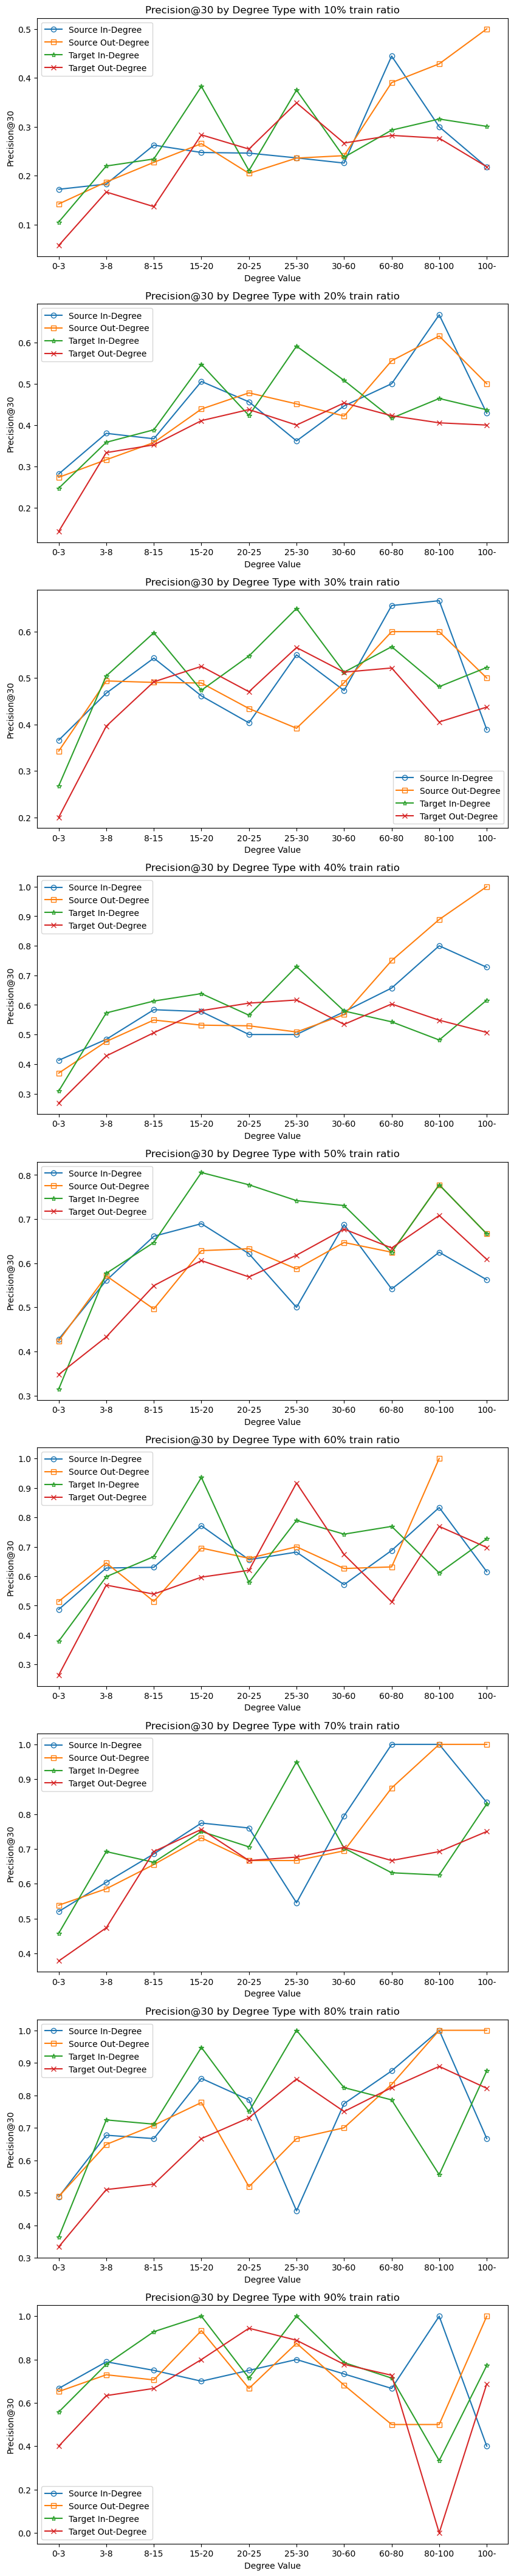

In [290]:
fig,ax=plt.subplots(nrows=9)
fig.set_size_inches(10,54)
x = [0, 1, 2, 3, 4,5,6,7,8,9]
tickslabel = [f'{degree[i]}-{degree[i+1]}' if i+1 < len(degree) else f'{degree[i]}-'for i in range(len(degree))]
for i in range(9):
    
    # 绘制四条折线
    ax[i].plot(x, precision_45[i][0],marker='o',markerfacecolor='none',label='Source In-Degree')
    ax[i].plot(x, precision_45[i][1], marker='s',markerfacecolor='none',label='Source Out-Degree')
    ax[i].plot(x, precision_45[i][2], marker='*',markerfacecolor='none',label='Target In-Degree')
    ax[i].plot(x, precision_45[i][3], marker='x',markerfacecolor='none',label='Target Out-Degree')

    # 添加图例
    ax[i].legend()

    # 添加标题和坐标轴标签
    ax[i].set_title(f'Precision@30 by Degree Type with {(i+1)*10}% train ratio')
    ax[i].set_xlabel('Degree Value')
    ax[i].set_ylabel('Precision@30')
    ax[i].set_xticks(x,tickslabel)

# 显示图形
plt.show()

## 两个图里低入度(0-20)的预测准确度都高于低出度的(低出度说明这个节点本身活跃度并不高，而低入度比较常见)
## 入度曲线在不同度区间的准确度起伏非常大，比较混乱，但一般来说是中度数节点的准确度比较高
## 目标图曲线的大部分区间位于源图曲线之上，而总的准确度又是一样的，说明模型对目标图的大部分区间预测的比源图好
## 变化目标图的度数区间带来的提升比变化源图的提升大，即对信息更加不丰富的图数据中的低资源部分增强可能更加有利于提升性能
## 源图：在低度和中度区间，增加入度的提升比增加出度大(没人关注的时候多了关注者说明节点重要性显著提升)；而在高度区间，增加出度的提升比增加入度的大(有很多人关注的时候增加关注者意义不大，不如提升节点本身的活跃度即出度重要)
## 出度曲线相对入度曲线更加平缓，即变化入度带来的提升不稳定，变化出度带来的提升稳定但相对没那么明显

In [114]:
#train_four是9个训练集下所使用的训练数据的四种度

#包含1个对照组和4个实验组
groups=5
#每组五个度的范围:0-3,3-10,10-25,25-100,100-
categories=5
#分四种度数，源图的入度出度，目标图的入度出度
type=4
#统计训练数据中各个节点的入度出度分布情况
degree_count = np.zeros([len(train_four),type,groups,categories],int)

for i in range(0,9):
    for key,value in train_four[i].items():
        for j in range(0,type):
            if value[j]>=0 and value[j]<3:
                degree_count[i][j][0][0] = degree_count[i][j][0][0]+1
            elif value[j]>=3 and value[j]<10:
                degree_count[i][j][0][1] = degree_count[i][j][0][1]+1
            elif value[j]>=10 and value[j]<25:
                degree_count[i][j][0][2] = degree_count[i][j][0][2]+1
            elif value[j]>=25 and value[j]<100:
                degree_count[i][j][0][3] = degree_count[i][j][0][3]+1
            elif value[j]>=100 :
                degree_count[i][j][0][4] = degree_count[i][j][0][4]+1

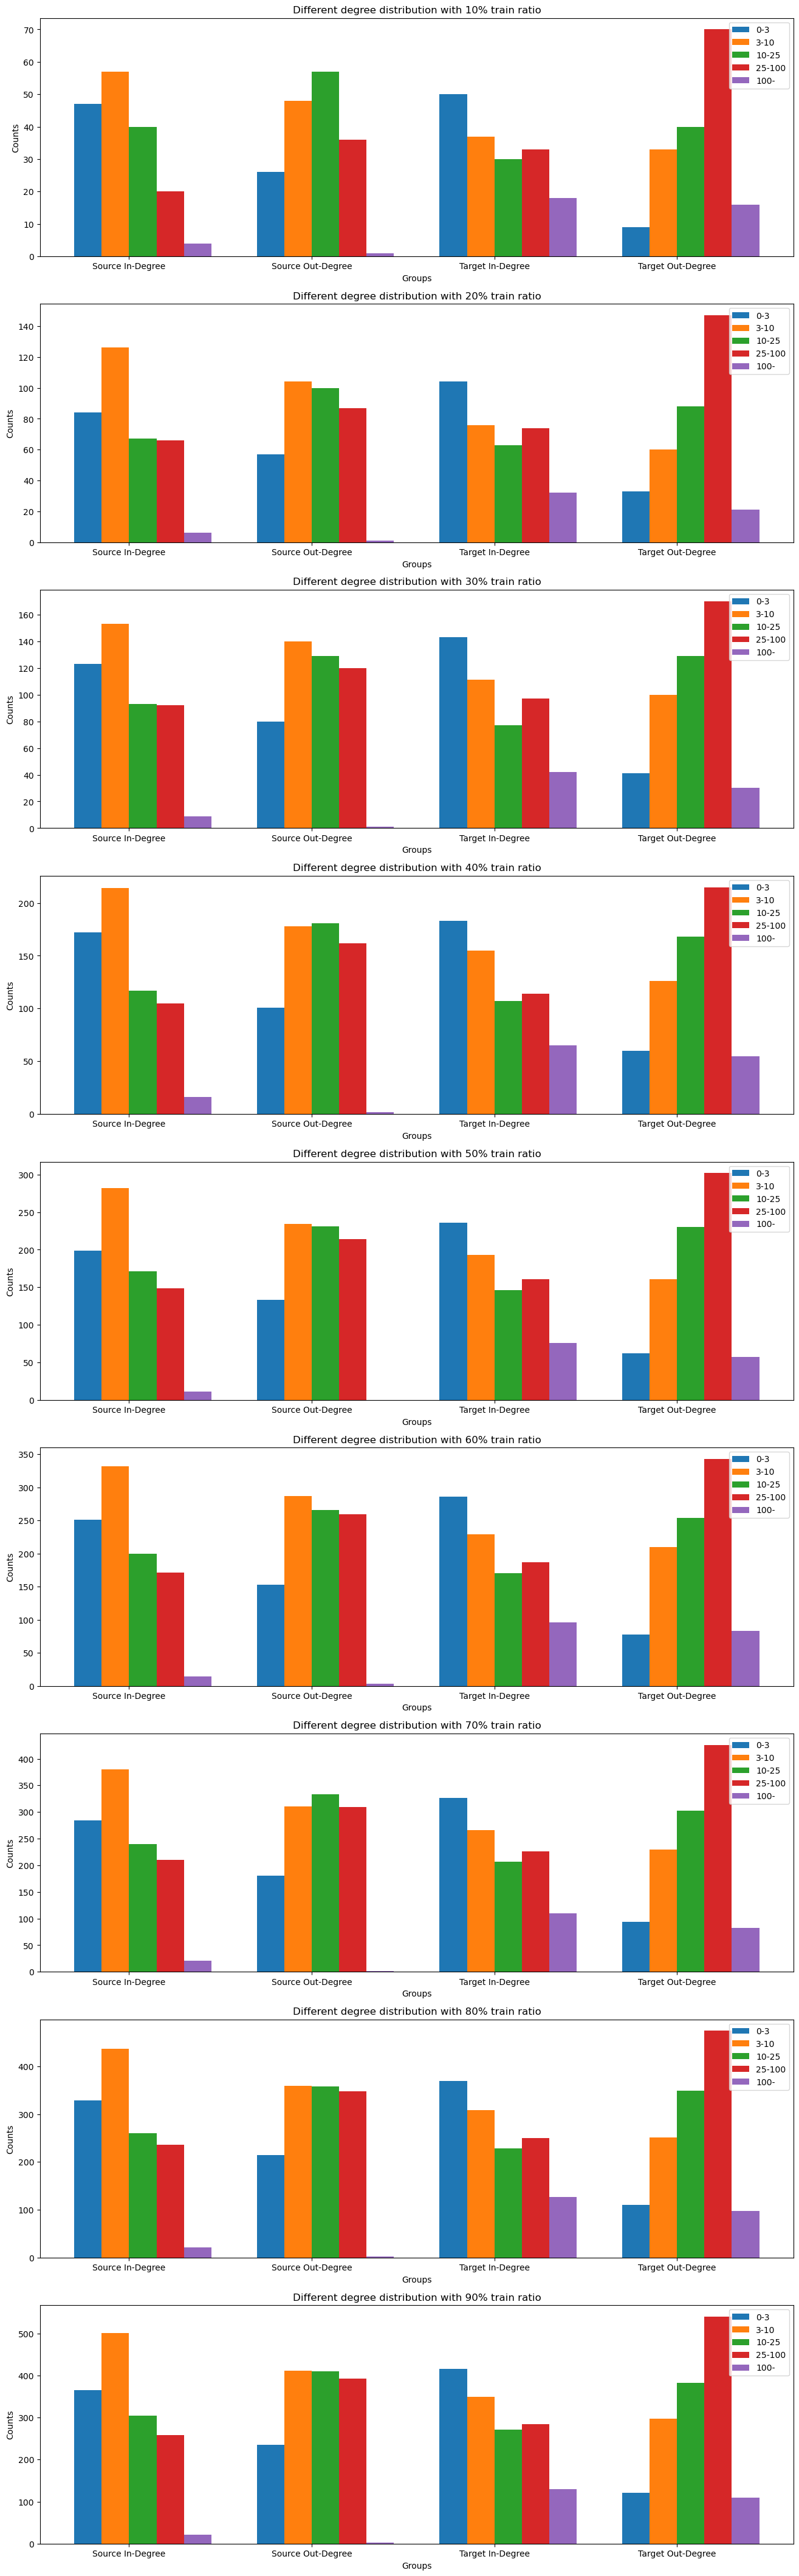

In [313]:
#横轴是四种度数
x=np.arange(4)

fig,ax=plt.subplots(nrows=len(train_four))
fig.set_size_inches(16, 54)
width=0.15
labels = ['0-3', '3-10', '10-25', '25-100', '100-']
tickslabels = ['Source In-Degree', 'Source Out-Degree', 'Target In-Degree', 'Target Out-Degree']

for m in range(len(train_four)):
    for n in range(5):
        ax[m].bar(x + n * width, np.transpose(degree_count[m])[n][0], width, label=labels[n])     
    ax[m].set_xlabel('Groups')
    ax[m].set_ylabel('Counts')
    ax[m].set_title(f'Different degree distribution with {(m+1)*10}% train ratio')
    ax[m].set_xticks(x + width * (type - 1) / 2)
    ax[m].set_xticklabels(tickslabels)
    ax[m].legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

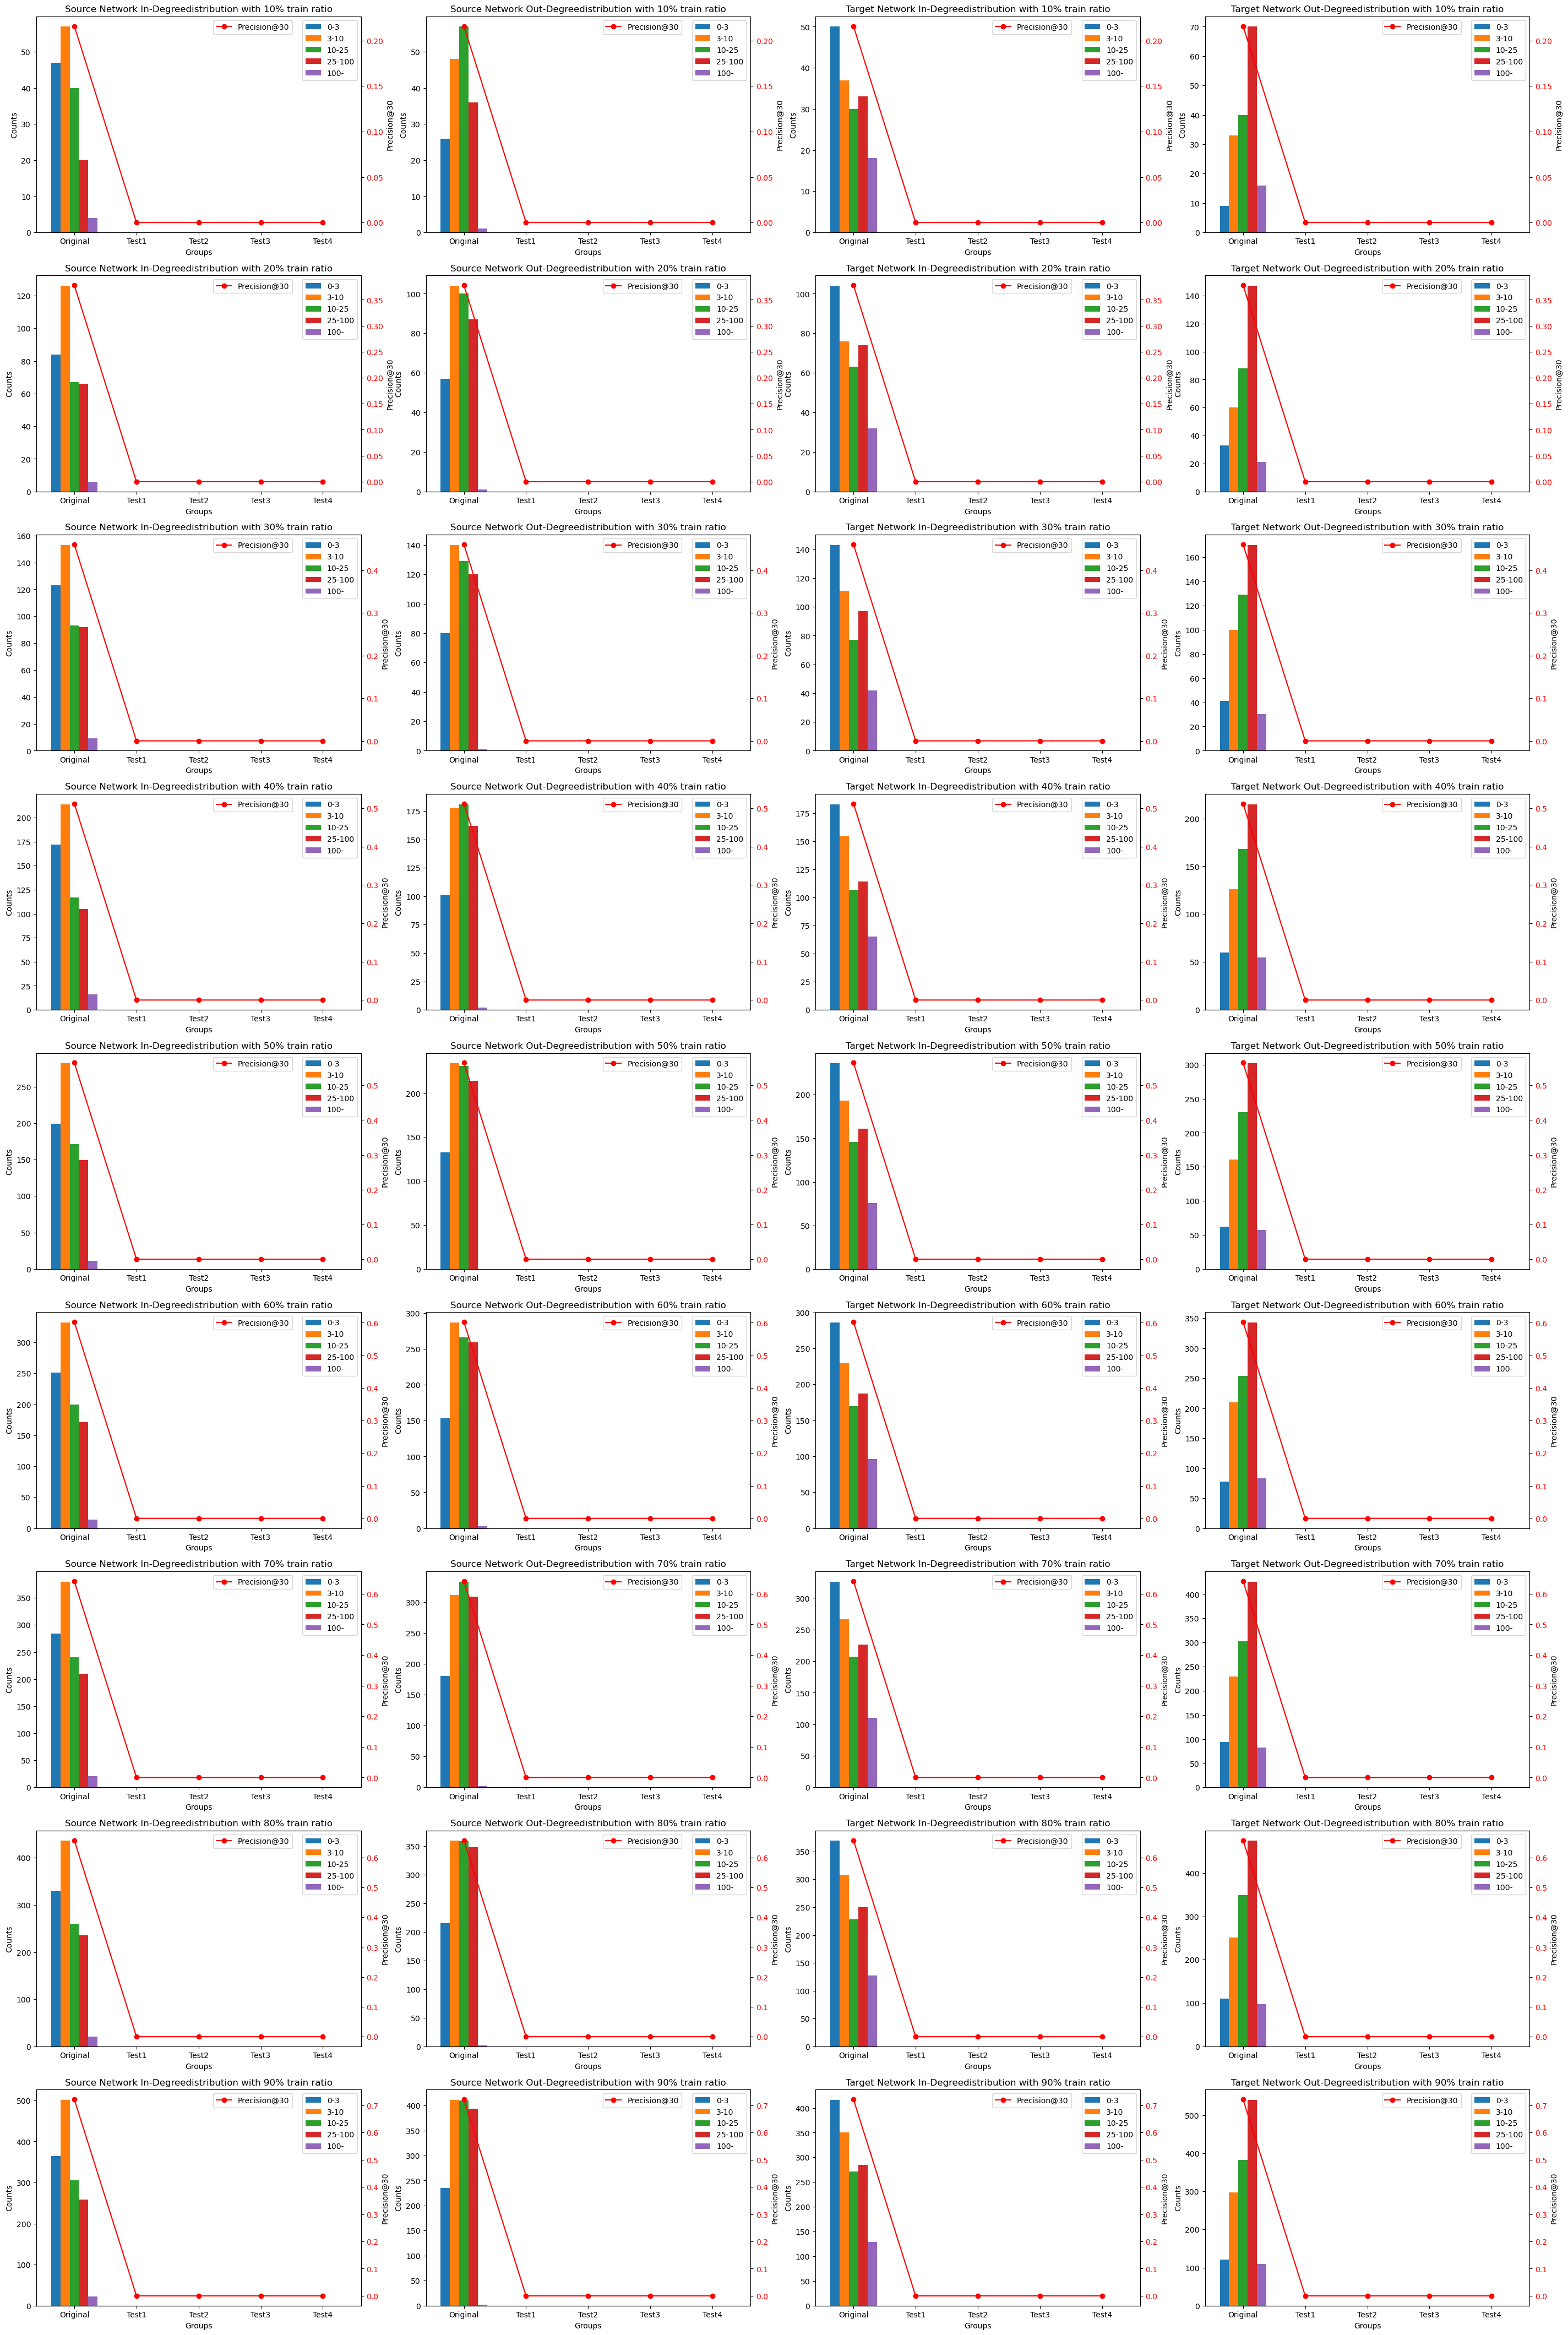

In [158]:
precision = np.zeros([9,5],dtype=float)
for i in range(0,9):
    precision[i][0]=len(merged_list_x[i])/len(test_anchors[i])

x=np.arange(categories)

fig,ax=plt.subplots(nrows=len(train_four),ncols=type)
fig.set_size_inches(35, 54)
width=0.15
labels = ['0-3', '3-10', '10-25', '25-100', '100-']
titles = ['Source Network In-Degree','Source Network Out-Degree','Target Network In-Degree','Target Network Out-Degree']
for m in range(len(train_four)):
    for n in range(type):
        for i in range(groups):
            ax[m][n].bar(x + i * width, np.transpose(degree_count[m][n])[i], width, label=labels[i])
            
        ax[m][n].set_xlabel('Groups')
        ax[m][n].set_ylabel('Counts')
        ax[m][n].set_title(titles[n]+f'distribution with {(m+1)*10}% train ratio')
        ax[m][n].set_xticks(x + width * (categories - 1) / 2)
        ax[m][n].set_xticklabels(['Original', 'Test1', 'Test2', 'Test3', 'Test4'])
        ax[m][n].legend(loc='upper right', bbox_to_anchor=(1, 1))

        ax2=ax[m][n].twinx()
        ax2.plot(x + (categories-1)* width/2,precision[m],marker='o', linestyle='-', color='red', label='Precision@30')
        ax2.set_ylabel('Precision@30')
        ax2.tick_params(axis='y', labelcolor='red')
        # 添加图例
        ax2.legend(loc='upper right',bbox_to_anchor=(0.8, 1))

plt.show()

In [20]:
prop_x,prop_y = [[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[]]
x_interval,y_interval = [[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[]]
for i in range(9):
    values_x = list(sorted_x[i].values())
    values_y = list(sorted_y[i].values())
    # 将列表按照其长度分为若干个区间
    n = 10
    bins_x = np.linspace(0, len(values_x)-1, n+1, dtype=int)
    bins_y = np.linspace(0, len(values_y)-1, n+1, dtype=int)
    for j in range(n):
        count=0
        count_all=0
        start_x = values_x[bins_x[j]]
        end_x = values_x[bins_x[j+1]]
        if start_x == end_x:
            continue
        for key, value in merged_list_x[i].items():
            if start_x <= value < end_x:
                count = count+1
        for key, value in sorted_x[i].items():
            if start_x <= value < end_x :
                count_all = count_all+1
        if start_x not in x_interval[i]:
            x_interval[i].append(start_x)
        if end_x not in x_interval[i]:
            x_interval[i].append(end_x)
        prop_x[i].append(count/(count_all))

        count=0
        count_all=0
        start_y = values_y[bins_y[j]]
        end_y = values_y[bins_y[j+1]]
        if start_y == end_y:
            continue
        for key, value in merged_list_y[i].items():
            if start_y <= value < end_y:
                count = count+1
        for key, value in sorted_y[i].items():
            if start_y <= value < end_y:
                count_all = count_all+1 
        if start_y not in y_interval[i]:
            y_interval[i].append(start_y)
        if end_y not in y_interval[i]:
            y_interval[i].append(end_y)
        prop_y[i].append(count/(count_all))

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=1)
fig.set_size_inches(8, 72)
for i in range(9):
    x = list(test_x[i].values())
    y = list(test_y[i].values())

    axes[i].scatter(x, y,c='blue')
    for key,value in degree_x_right[i].items():
        axes[i].scatter(value, degree_y_right[i][key],c='red')
    for key,value in degree_x_right_inverse[i].items():
        axes[i].scatter(value, degree_y_right_inverse[i][key],c='green')
    # 添加标题和坐标轴标签
    axes[i].set_title('Train set '+str(i+1)+':The Degree of the right anchor node')
    axes[i].set_xlabel('Degree in source graph')
    axes[i].set_ylabel('Degree in target graph')

# 显示图形
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(15, 45)
for i in range(1):
    x_labels = list(sorted_x[i].keys())
    x = range(len(x_labels))
    y = [sorted_x[i][label] for label in x_labels]
    rects = axes[i][0].bar(x, y)
    for j, label in enumerate(x_labels):
        if label in sorted_x_right[i] or label in sorted_x_right_inverse[i]:
            rects[j].set_color('r')
    # 设置标题和标签
    axes[i][0].set_title('Train set '+str(i+1)+': right anchors in the test anchors set in source graph')
    axes[i][0].set_xlabel('node number')
    axes[i][0].set_ylabel('Degree')
    axes[i][0].set_xticks(x)
    axes[i][0].set_xticklabels(x_labels)


    x_labels = list(sorted_y[i].keys())
    x = range(len(x_labels))
    y = [sorted_y[i][label] for label in x_labels]
    rects = axes[i][1].bar(x, y)
    for j, label in enumerate(x_labels):
        if label in sorted_y_right[i] or label in sorted_y_right_inverse[i]:
            rects[j].set_color('r')
    # 设置标题和标签
    axes[i][1].set_title('Train set '+str(i+1)+': right anchors in the test anchors set in target graph')
    axes[i][1].set_xlabel('node number')
    axes[i][1].set_ylabel('Degree')
    axes[i][1].set_xticks(x)
    axes[i][1].set_xticklabels(x_labels)
    
plt.show()

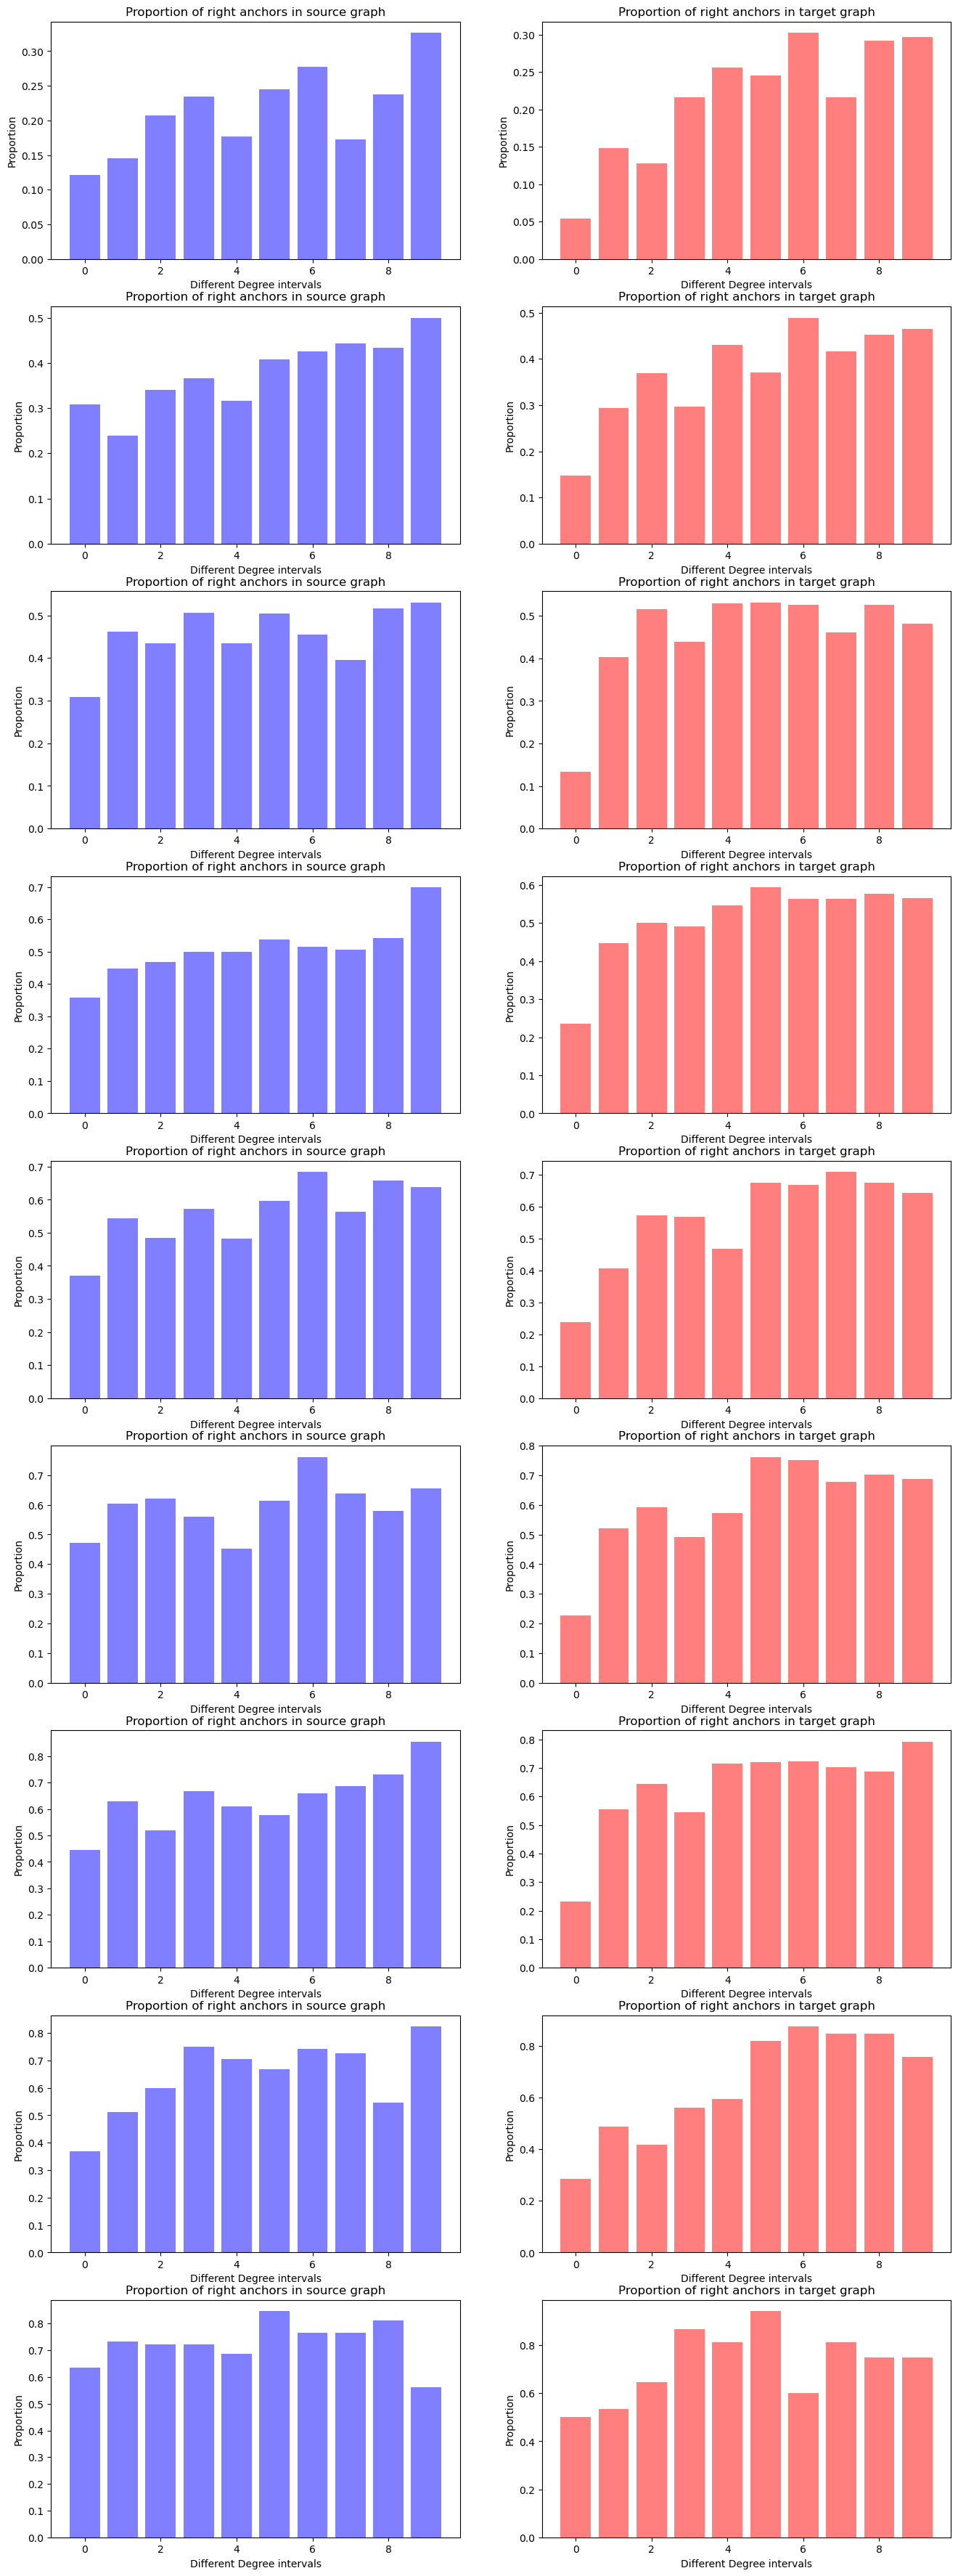

In [26]:
fig, axes = plt.subplots(nrows=9, ncols=2)
fig.set_size_inches(16, 45)
for i in range(9):
    axes[i][0].bar(range(10),prop_x[i],color='blue',alpha=0.5)
    axes[i][0].set_title('Proportion of right anchors in source graph')
    axes[i][0].set_xlabel('Different Degree intervals')
    axes[i][0].set_ylabel('Proportion')

    axes[i][1].bar(range(10),prop_y[i],color='red', alpha=0.5)
    axes[i][1].set_title('Proportion of right anchors in target graph')
    axes[i][1].set_xlabel('Different Degree intervals')
    axes[i][1].set_ylabel('Proportion')

plt.show()

# 图构建，出入度获取，入度\出度比例计算，归一化,排序

In [30]:
G_x = nx.DiGraph()
G_y = nx.DiGraph()
# 添加有向边
for source, targets in directed_edge_x.items():
    for target in targets:
        G_x.add_edge(source, target)

# 添加有向边
for source, targets in directed_edge_y.items():
    for target in targets:
        G_y.add_edge(source, target)


x_in_degrees = dict(G_x.in_degree())
x_out_degrees = dict(G_x.out_degree())
y_in_degrees = dict(G_y.in_degree())
y_out_degrees = dict(G_y.out_degree())

ratios_x_all = {}
for node in x_in_degrees.keys():
    # out_degree = all_out_degrees[node] if all_out_degrees[node] != 0 else 1
    out_degree = x_out_degrees[node]+0.01
    ratio = x_in_degrees[node]+0.01 / out_degree
    ratios_x_all[node] = ratio
ratios_y_all = {}
for node in y_in_degrees.keys():
    # out_degree = all_out_degrees[node] if all_out_degrees[node] != 0 else 1
    out_degree = y_out_degrees[node]+0.01
    ratio = y_in_degrees[node]+0.01 / out_degree
    ratios_y_all[node] = ratio


in_test_x,out_test_x,in_test_y,out_test_y = [],[],[],[]

for i in range(0,9):
    in_test_x.append(dict(G_x.in_degree(test_anchors[i])))
    out_test_x.append(dict(G_x.out_degree(test_anchors[i])))
    in_test_y.append(dict(G_y.in_degree(test_anchors[i])))
    out_test_y.append(dict(G_y.out_degree(test_anchors[i])))

ratios_test_x = []
ratios_test_y = []
for i in range(0,9):
    temp_data = {}
    for node in in_test_x[i].keys():
        # out_degree = out_degrees_x[node] if out_degrees_x[node] != 0 else 1
        out_degree = out_test_x[i][node]+0.01
        ratio = in_test_x[i][node]+0.01 / out_degree
        temp_data[node] = ratio
    ratios_test_x.append(temp_data)

for i in range(0,9):
    temp_data = {}
    for node in in_test_y[i].keys():
            # out_degree = out_degrees_x[node] if out_degrees_x[node] != 0 else 1
            out_degree = out_test_y[i][node]+0.01
            ratio = in_test_y[i][node]+0.01 / out_degree
            temp_data[node] = ratio
    ratios_test_y.append(temp_data)

ratios_x_right =[]
ratios_y_right =[]
ratios_x_right_inverse =[]
ratios_y_right_inverse =[]
for i in range(0,9):
    temp_right={}
    temp_right_inverse = {}
    for node in ratios_test_x[i].keys():
        if int(node) in precision_right_anchors[i]:
            temp_right[node] = ratios_test_x[i][node]
            # ratios_x_right[i][node] = ratios_test_x[i][node]
        if int(node) in precision_right_anchors_inverse[i]:
            temp_right_inverse[node] = ratios_test_x[i][node]
            # ratios_x_right_inverse[i][node] = ratios_test_x[i][node]
    ratios_x_right.append(temp_right)
    ratios_x_right_inverse.append(temp_right_inverse)
    temp_right={}
    temp_right_inverse = {}
    for node in ratios_test_y[i].keys():
        if int(node) in precision_right_anchors[i]:
            temp_right[node] = ratios_test_y[i][node]
            #ratios_y_right[i][node] = ratios_test_y[i][node]
        if int(node) in precision_right_anchors_inverse[i]:
            temp_right_inverse[node] = ratios_test_y[i][node]
            #ratios_x_right_inverse[i][node] = ratios_test_y[i][node]
    ratios_y_right.append(temp_right)
    ratios_y_right_inverse.append(temp_right_inverse)

normalized_ratios_test_x = [{},{},{},{},{},{},{},{},{}]
normalized_ratios_test_y = [{},{},{},{},{},{},{},{},{}]
normalized_ratios_x_all = {}
normalized_ratios_y_all = {}

""" #选两张图共同的最大最小值归一化
max_val = max(max(ratios_x_all.values()),max(ratios_y_all.values()))
min_val = min(min(ratios_x_all.values()),min(ratios_y_all.values()))
for key,value in ratios_x_all:
    normalized_ratios_x_all[key]=(value-min_val)/(max_val-min_val)
for key,value in ratios_y_all:
    normalized_ratios_y_all[key]=(value-min_val)/(max_val-min_val) 
for i in range(0,9):
    for key,value in ratios_test_x[i]:
        normalized_ratios_test_x[i][key]=(value-min_val)/(max_val-min_val)
    for key,value in ratios_test_y[i]:
        normalized_ratios_test_y[i][key]=(value-min_val)/(max_val-min_val)"""

#分开来归一化
max_val_x = max(ratios_x_all.values())
min_val_x = min(ratios_x_all.values())
max_val_y = max(ratios_y_all.values())
min_val_y = min(ratios_y_all.values())
for key,value in ratios_x_all.items():
    normalized_ratios_x_all[key]=(value-min_val_x)/(max_val_x-min_val_y)
for key,value in ratios_y_all.items():
    normalized_ratios_y_all[key]=(value-min_val_y)/(max_val_y-min_val_y)
for i in range(0,9):
    for key,value in ratios_test_x[i].items():
        normalized_ratios_test_x[i][key]=(value-min_val_x)/(max_val_x-min_val_x)
    for key,value in ratios_test_y[i].items():
        normalized_ratios_test_y[i][key]=(value-min_val_y)/(max_val_y-min_val_y)

#把归一化的还原
""" max_val = max(ratios_x_all.values())
min_val = min(ratios_x_all.values())
x_list_ori = []
y_list_ori = []
for value in x_list:
    x_list_ori.append(value*(max_val-min_val)+min_val)
max_val = max(ratios_y_all.values())
min_val = min(ratios_y_all.values())
for value in y_list:
    y_list_ori.append(value*(max_val-min_val)+min_val)
x_list_ori,y_list_ori """

""" sorted_ratios_x_all = dict(sorted(ratios_x_all.items(), key=lambda x: x[1]))
sorted_ratios_y_all = dict(sorted(ratios_y_all.items(), key=lambda x: x[1])) """

sorted_ratios_x = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_test_x]]
sorted_ratios_y = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_test_y]]
sorted_ratios_x_right = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_x_right]]
sorted_ratios_y_right = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_y_right]]
sorted_ratios_x_right_inverse = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_x_right_inverse]]
sorted_ratios_y_right_inverse = [dict(items) for items in [sorted(d.items(), key=lambda x: x[1]) for d in ratios_y_right_inverse]]


# 将F-T和T-F的预测结果合并

In [42]:
# 合并两个列表中的字典到一个新的列表中
merged_list_x = [dict1.update(dict2) or dict1 for dict1, dict2 in zip(sorted_ratios_x_right, sorted_ratios_x_right_inverse)]

merged_list_y = [dict1.update(dict2) or dict1 for dict1, dict2 in zip(sorted_ratios_y_right, sorted_ratios_y_right_inverse)]

# 计算在测试集中预测正确的锚节点在不同的入度\出度区间内所占的比例

In [45]:
prop_x,prop_y = [[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[]]
mean_degree_x,mean_degree_y = [[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[]]
x_interval,y_interval = [[],[],[],[],[],[],[],[],[]],[[],[],[],[],[],[],[],[],[]]
for i in range(9):
    values_x = list(sorted_ratios_x[i].values())
    values_y = list(sorted_ratios_y[i].values())
    # 将列表按照其长度分为若干个区间
    n = 10
    bins_x = np.linspace(0, len(values_x)-1, n+1, dtype=int)
    bins_y = np.linspace(0, len(values_y)-1, n+1, dtype=int)
    for j in range(n):
        count=0
        sum = 0
        count_all=0
        start_x = values_x[bins_x[j]]
        end_x = values_x[bins_x[j+1]]
        if start_x == end_x:
            continue
        for key, value in merged_list_x[i].items():
            if start_x <= value < end_x:
                count = count+1
                sum = sum + G_x.degree(key)
        for key, value in sorted_ratios_x[i].items():
            if start_x <= value < end_x :
                count_all = count_all+1
        if start_x not in x_interval[i]:
            x_interval[i].append(start_x)
        if end_x not in x_interval[i]:
            x_interval[i].append(end_x)
        prop_x[i].append(count/(count_all))
        mean_degree_x[i].append(sum/count)

        count=0
        sum = 0
        count_all=0
        start_y = values_y[bins_y[j]]
        end_y = values_y[bins_y[j+1]]
        if start_y == end_y:
            continue
        for key, value in merged_list_y[i].items():
            if start_y <= value < end_y:
                count = count+1
                sum = sum + G_y.degree(key)
        for key, value in sorted_ratios_y[i].items():
            if start_y <= value < end_y:
                count_all = count_all+1 
        if start_y not in y_interval[i]:
            y_interval[i].append(start_y)
        if end_y not in y_interval[i]:
            y_interval[i].append(end_y)
        prop_y[i].append(count/(count_all))
        mean_degree_y[i].append(sum/count)

# 绘制散点图

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=1)
fig.set_size_inches(8, 72)
for i in range(1):
    x = list(ratios_test_x[i].values())
    y = list(ratios_test_y[i].values())

    axes[i].scatter(x, y,c='blue')
    for key,value in ratios_x_right[i].items():
        axes[i].scatter(value, ratios_y_right[i][key],c='red')
    for key,value in ratios_x_right_inverse[i].items():
        axes[i].scatter(value, ratios_y_right_inverse[i][key],c='green')
    
    # axes[0].set_xlim(0,110.7)
    # axes[0].set_ylim(0,319.7)
    axes[i].set_xlim(0,50)
    axes[i].set_ylim(0,300)
    # 添加标题和坐标轴标签
    axes[i].set_title('Train set '+str(i+1)+':The In-degree\Out-degree of the right anchor node')
    axes[i].set_xlabel('In-degree/Out-degree in source graph')
    axes[i].set_ylabel('In-degree/Out-degree in target graph')

# 显示图形
plt.show()

# 绘制条形图

In [ ]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(15, 45)
for i in range(9):
    x_labels = list(sorted_ratios_x[i].keys())
    x = range(len(x_labels))
    y = [sorted_ratios_x[i][label] for label in x_labels]
    rects = axes[i][0].bar(x, y)
    for j, label in enumerate(x_labels):
        if label in sorted_ratios_x_right[i] or label in sorted_ratios_x_right_inverse[i]:
            rects[j].set_color('r')
    # 设置标题和标签
    axes[i][0].set_title('Train set '+str(i+1)+': right anchors in the test anchors set in source graph')
    axes[i][0].set_xlabel('node number')
    axes[i][0].set_ylabel('In-degree\Out-degree')
    axes[i][0].set_xticks(x)
    axes[i][0].set_xticklabels(x_labels)


    x_labels = list(sorted_ratios_y[i].keys())
    x = range(len(x_labels))
    y = [sorted_ratios_y[i][label] for label in x_labels]
    rects = axes[i].bar(x, y)
    for j, label in enumerate(x_labels):
        if label in sorted_ratios_y_right[i] or label in sorted_ratios_y_right_inverse[i]:
            rects[j][1].set_color('r')
    # 设置标题和标签
    axes[i][1].set_title('Train set '+str(i+1)+': right anchors in the test anchors set in target graph')
    axes[i][1].set_xlabel('node number')
    axes[i][1].set_ylabel('In-degree\Out-degree')
    axes[i][1].set_xticks(x)
    axes[i][1].set_xticklabels(x_labels)
    
plt.show()

In [47]:
normalized_mean_degree_x = []
for sublist in mean_degree_x:
    normalized_sublist = np.linalg.norm(sublist)
    normalized_mean_degree_x.append(sublist / normalized_sublist)
normalized_mean_degree_y = []
for sublist in mean_degree_y:
    normalized_sublist = np.linalg.norm(sublist)
    normalized_mean_degree_y.append(sublist / normalized_sublist)

# 绘制柱状图

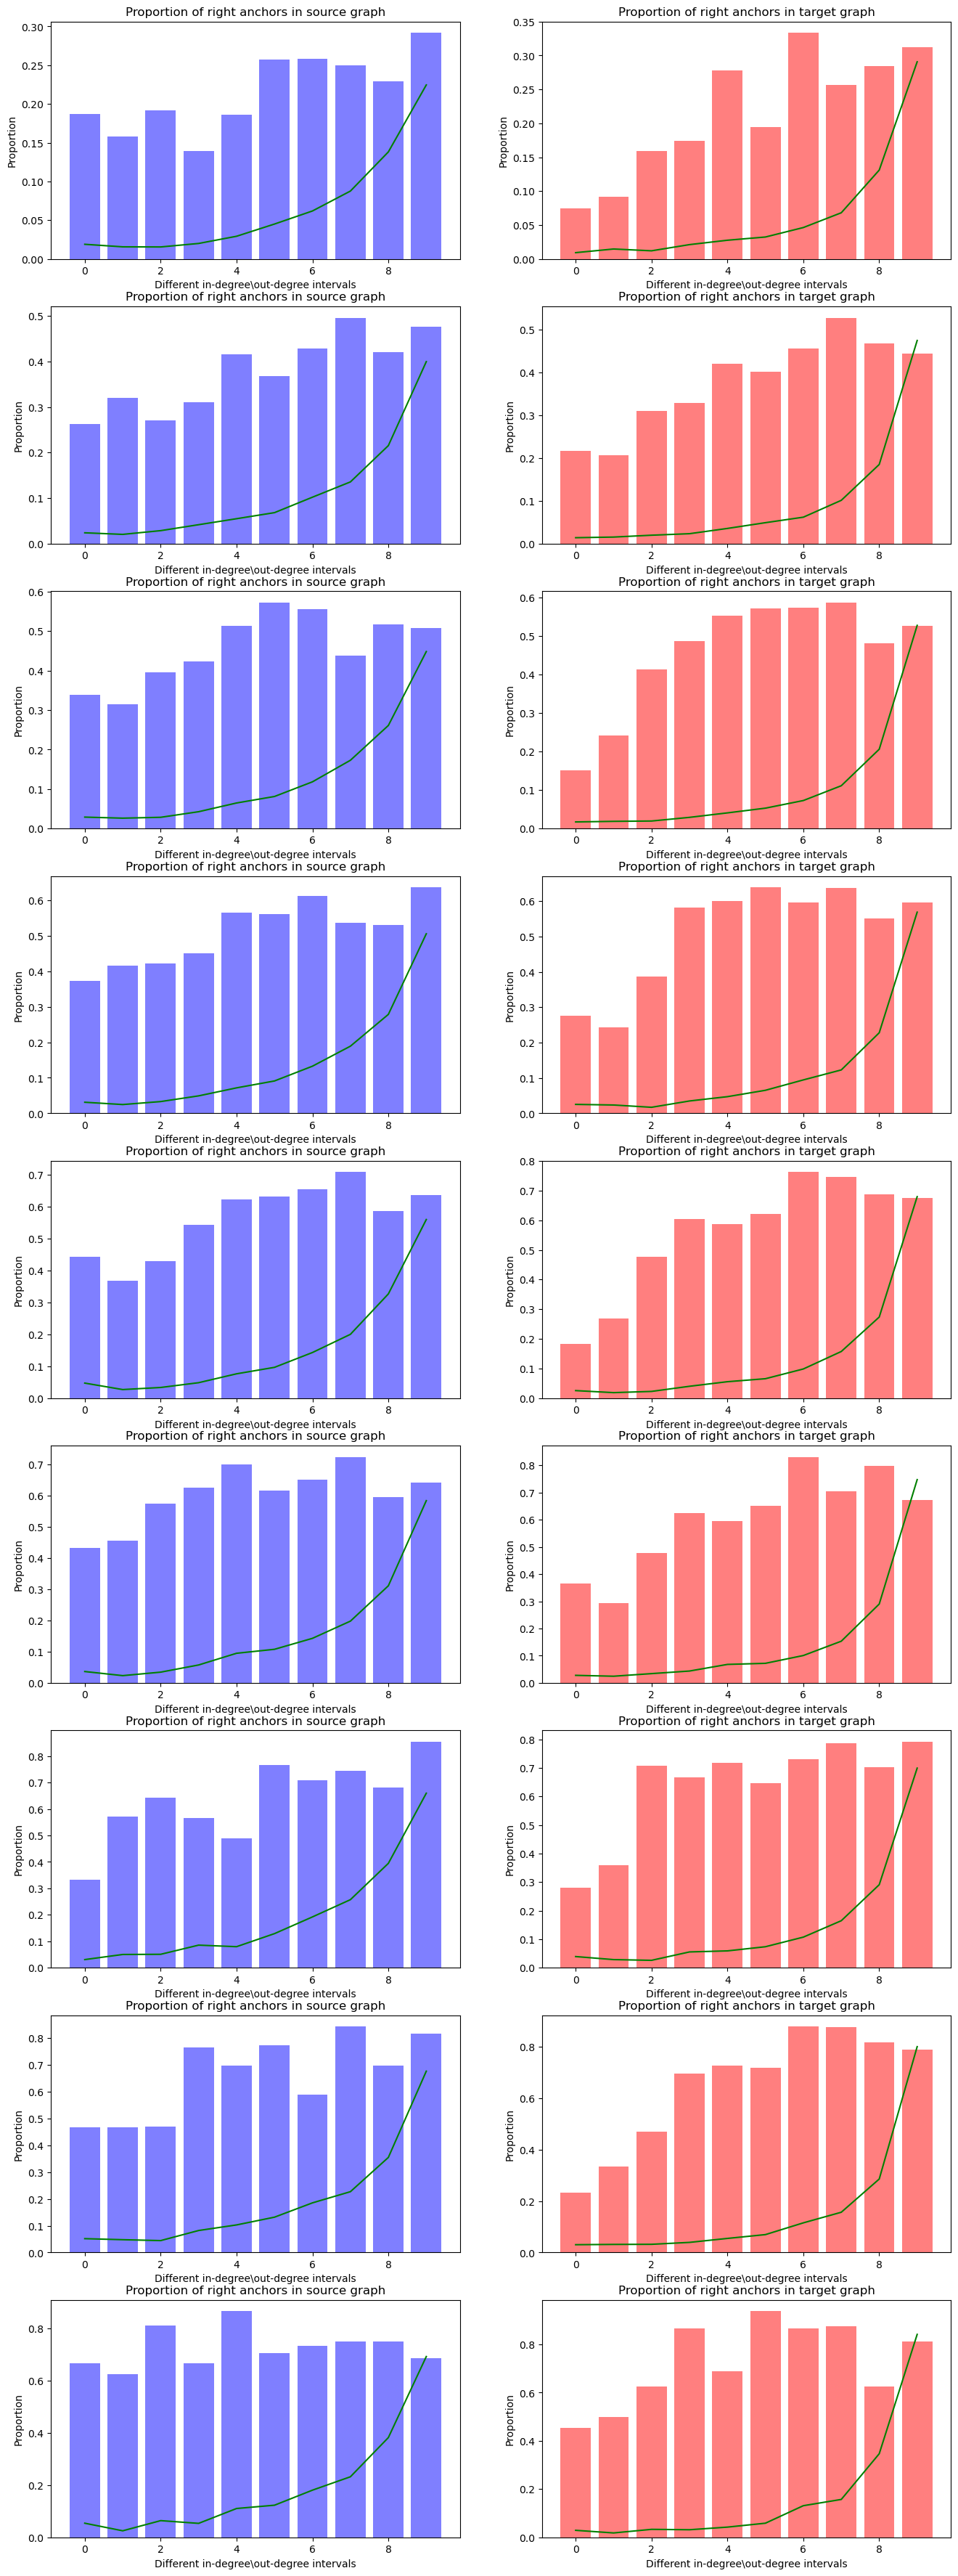

In [50]:
fig, axes = plt.subplots(nrows=9, ncols=2)
fig.set_size_inches(16, 45)
for i in range(9):
    axes[i][0].bar(range(10),prop_x[i],color='blue',alpha=0.5)
    
    axes[i][0].plot(range(10),normalized_mean_degree_x[i] * max(prop_x[i]),color='green')
    axes[i][0].set_title('Proportion of right anchors in source graph')
    axes[i][0].set_xlabel('Different in-degree\out-degree intervals')
    axes[i][0].set_ylabel('Proportion')

    axes[i][1].bar(range(10),prop_y[i],color='red', alpha=0.5)
    axes[i][1].plot(range(10),normalized_mean_degree_y[i]* max(prop_y[i]),color='green')
    axes[i][1].set_title('Proportion of right anchors in target graph')
    axes[i][1].set_xlabel('Different in-degree\out-degree intervals')
    axes[i][1].set_ylabel('Proportion')

plt.show()

In [ ]:
#查看归一化值的四个小柱状图
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))
axes[0].plot(normalized_ratios_x.keys(), normalized_ratios_x.values())
axes[1].plot(normalized_ratios_x_all.keys(), normalized_ratios_x_all.values())
axes[2].plot(normalized_ratios_y.keys(), normalized_ratios_y.values())
axes[3].plot(normalized_ratios_y_all.keys(), normalized_ratios_y_all.values())
plt.subplots_adjust(wspace=0.3)
plt.show()